In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load data
df = pd.read_csv("formatted_results.csv")

In [11]:
df["Overlap"] = df["Overlap"].astype(float)
df["TrainedF1"] = df["TrainedF1"].astype(float)
df["ReidentificationRate"] = df["ReidentificationRate"].astype(float)
# Metrics to visualize
metrics = [
    ("TrainedPrecision", "Precision"),
    ("TrainedRecall", "Recall"),
    ("TrainedF1", "F1 Score"),
    ("ReidentificationRate", "Re-Identification Rate"),
]

baseline_metrics = {
    "fakename_1k":     {"Precision": 0.2162, "Recall": 0.2476, "F1": 0.2300},
    "fakename_2k":     {"Precision": 0.2131, "Recall": 0.2452, "F1": 0.2271},
    "fakename_5k":     {"Precision": 0.2144, "Recall": 0.2470, "F1": 0.2287},
    "fakename_10k":    {"Precision": 0.2151, "Recall": 0.2467, "F1": 0.2289},
    "fakename_20k":    {"Precision": 0.2153, "Recall": 0.2473, "F1": 0.2293},
    "fakename_50k":    {"Precision": 0.2151, "Recall": 0.2463, "F1": 0.2288},
    "titanic_full":    {"Precision": 0.2468, "Recall": 0.3770, "F1": 0.2896},
    "euro_person":     {"Precision": 0.2197, "Recall": 0.2446, "F1": 0.2306}
}

encoding_map = {
    "BloomFilter": "Bloom Filter",
    "TabMinHash": "Tabulation Minhash",
    "TwoStepHash": "Two-Step Hash"
}

In [ ]:
groupedByEncoding = (
    df.groupby(["Encoding", "Overlap"])
      [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
      .mean()
      .reset_index()
)
groupedByDataset = (
  df.groupby(["Dataset", "Overlap"])
    [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
    .mean()
    .reset_index()
)
groupedByEncodingAndDataset = (
    df.groupby(["Encoding", "Overlap", "Dataset"])
      [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
      .mean()
      .reset_index()
)

,Encoding,Overlap,Dataset,TrainedPrecision,TrainedRecall,TrainedF1,ReidentificationRate
0,BloomFilter,0.2,euro_person.tsv,0.961093,0.873120,0.912513,0.014200
1,BloomFilter,0.2,fakename_10k.tsv,0.536254,0.400423,0.417738,0.000025
2,BloomFilter,0.2,fakename_20k.tsv,0.963199,0.794434,0.865123,0.009600
3,BloomFilter,0.2,fakename_2k.tsv,0.040120,0.057832,0.040757,0.000000
4,BloomFilter,0.2,fakename_5k.tsv,0.130002,0.160007,0.126375,0.000000
...,...,...,...,...,...,...,...
75,TwoStepHash,0.8,fakename_1k.tsv,0.812171,0.448944,0.560193,0.000000
76,TwoStepHash,0.8,fakename_20k.tsv,0.989543,0.980925,0.984800,0.225500
77,TwoStepHash,0.8,fakename_2k.tsv,0.923598,0.817931,0.862615,0.006750
78,TwoStepHash,0.8,fakename_5k.tsv,0.960558,0.860932,0.904275,0.045750


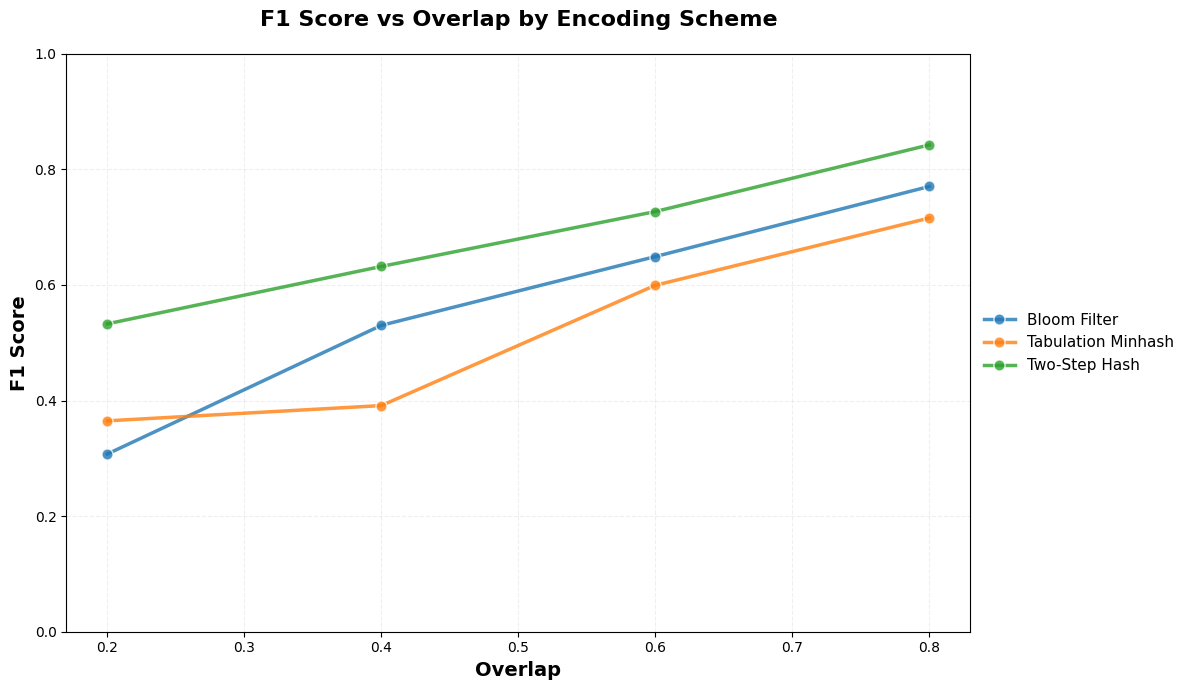

In [27]:
# Create F1 Score vs Overlap plot with encoding schemes as separate lines
plt.figure(figsize=(12, 7))

# Get unique encoding schemes
encodings = groupedByEncoding['Encoding'].unique()

# Create a color palette for the different encoding schemes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

encodings.sort()

for i, encoding in enumerate(encodings):
    # Filter data for this encoding
    encoding_data = groupedByEncoding[groupedByEncoding['Encoding'] == encoding]
    
    # Plot the line
    plt.plot(encoding_data['Overlap'], encoding_data['TrainedF1'], 
             marker='o', 
             color=colors[i], 
             linewidth=2.5, 
             markersize=8,
             markeredgecolor="white",
             label=encoding_map.get(encoding, encoding),
             alpha=0.8)

# Customize the plot
plt.xlabel('Overlap', fontsize=14, fontweight='bold')
plt.ylabel('F1 Score', fontsize=14, fontweight='bold')
plt.title('F1 Score vs Overlap by Encoding Scheme', fontsize=16, fontweight='bold', pad=20)
# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

plt.ylim(0, 1)

# Improve layout
plt.tight_layout()
plt.show()

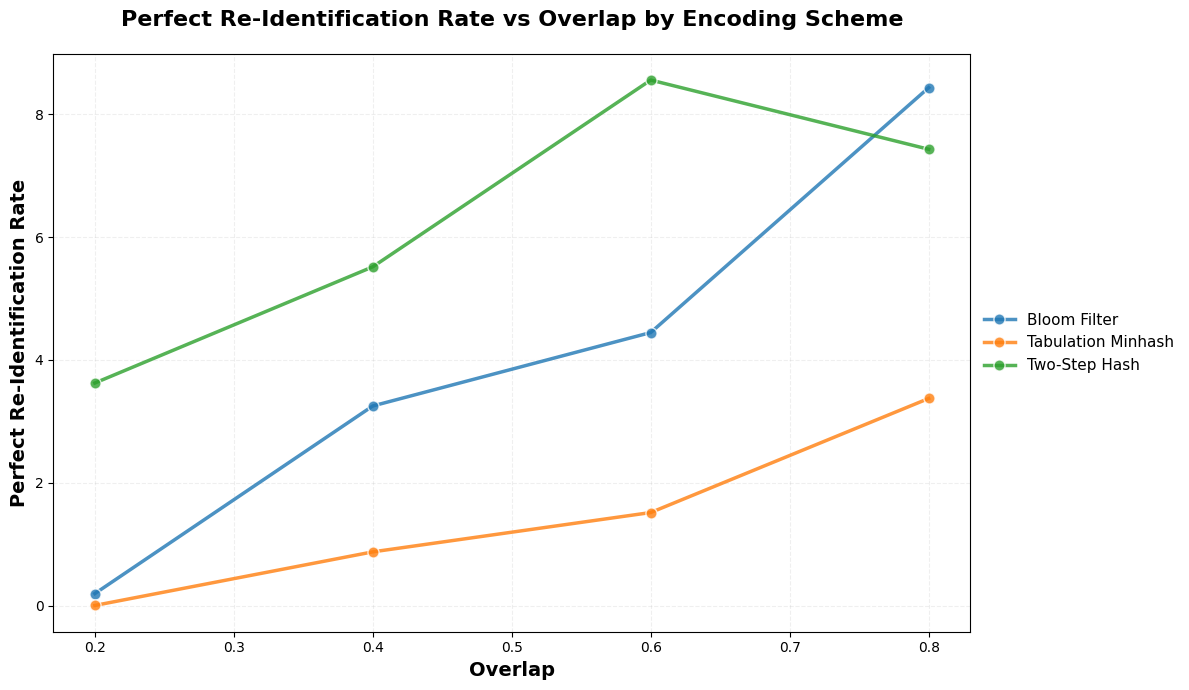

In [14]:
# Create PRR vs Overlap plot with encoding schemes as separate lines
plt.figure(figsize=(12, 7))

# Get unique encoding schemes
encodings = groupedByEncoding['Encoding'].unique()

# Create a color palette for the different encoding schemes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

for i, encoding in enumerate(encodings):
    # Filter data for this encoding
    encoding_data = groupedByEncoding[groupedByEncoding['Encoding'] == encoding]
    
    # Plot the line
    plt.plot(encoding_data['Overlap'], encoding_data['ReidentificationRate'] * 100, 
             marker='o', 
             color=colors[i], 
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             markersize=8,
             label=encoding_map.get(encoding, encoding),
             alpha=0.8)

# Customize the plot
plt.xlabel('Overlap', fontsize=14, fontweight='bold')
plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')
plt.title('Perfect Re-Identification Rate vs Overlap by Encoding Scheme', fontsize=16, fontweight='bold', pad=20)
# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

# Improve layout
plt.tight_layout()
plt.show()

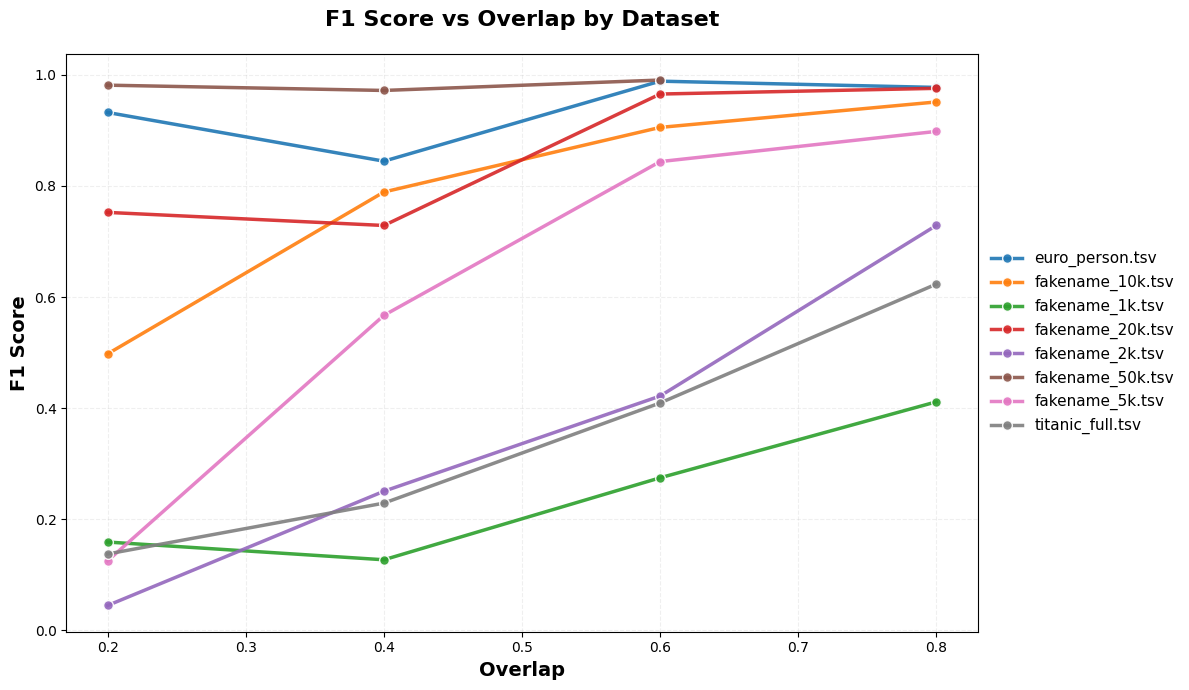

In [22]:
plt.figure(figsize=(12, 7))

datasets = groupedByDataset['Dataset'].unique()

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
]

datasets.sort()

for i, dataset in enumerate(datasets):
    dataset_data = groupedByDataset[groupedByDataset['Dataset'] == dataset]
    
    plt.plot(dataset_data['Overlap'], dataset_data['TrainedF1'], 
             marker='o', 
             markersize=7,
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             color=colors[i % len(colors)],
             label=dataset,
             alpha=0.9)

# Labels & title
plt.xlabel('Overlap', fontsize=14, fontweight='bold')
plt.ylabel('F1 Score', fontsize=14, fontweight='bold')
plt.title('F1 Score vs Overlap by Dataset', fontsize=16, fontweight='bold', pad=20)

# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

plt.tight_layout()
plt.show()

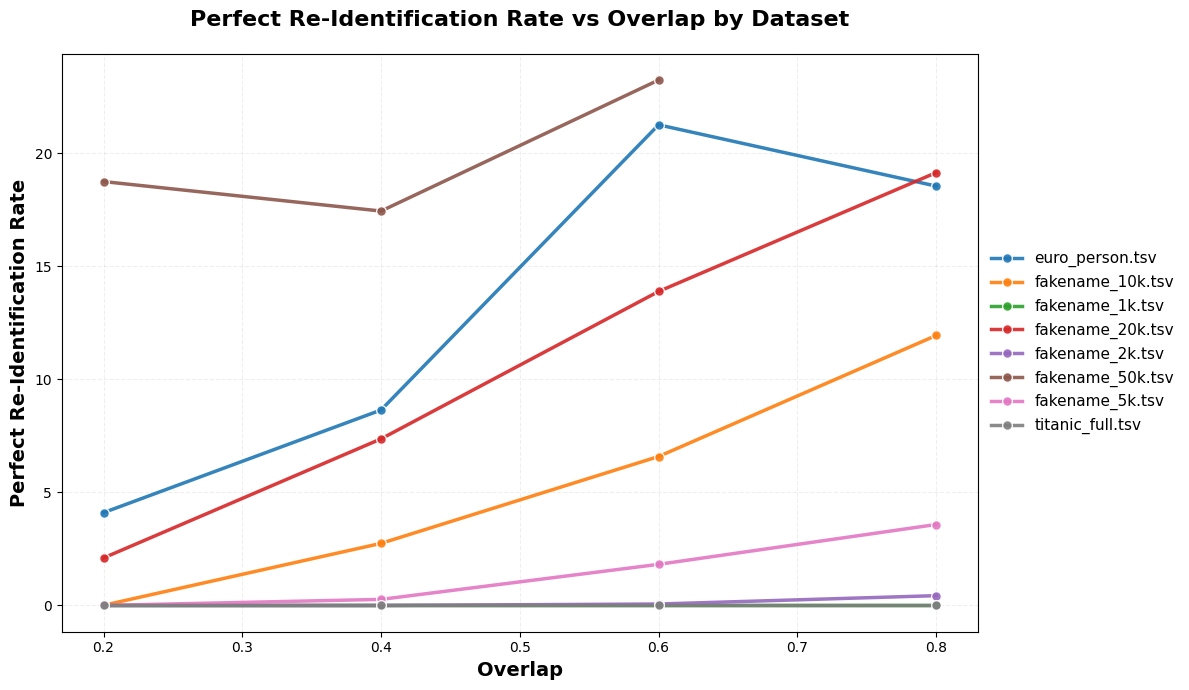

In [23]:
plt.figure(figsize=(12, 7))

datasets = groupedByDataset['Dataset'].unique()

datasets.sort()

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
]

for i, dataset in enumerate(datasets):
    dataset_data = groupedByDataset[groupedByDataset['Dataset'] == dataset]
    
    plt.plot(dataset_data['Overlap'], dataset_data['ReidentificationRate'] * 100, 
             marker='o', 
             markersize=7,
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             color=colors[i % len(colors)],
             label=dataset,
             alpha=0.9)

# Labels & title
plt.xlabel('Overlap', fontsize=14, fontweight='bold')
plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')
plt.title('Perfect Re-Identification Rate vs Overlap by Dataset', fontsize=16, fontweight='bold', pad=20)

# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

plt.tight_layout()
plt.show()

Encoding: BloomFilter


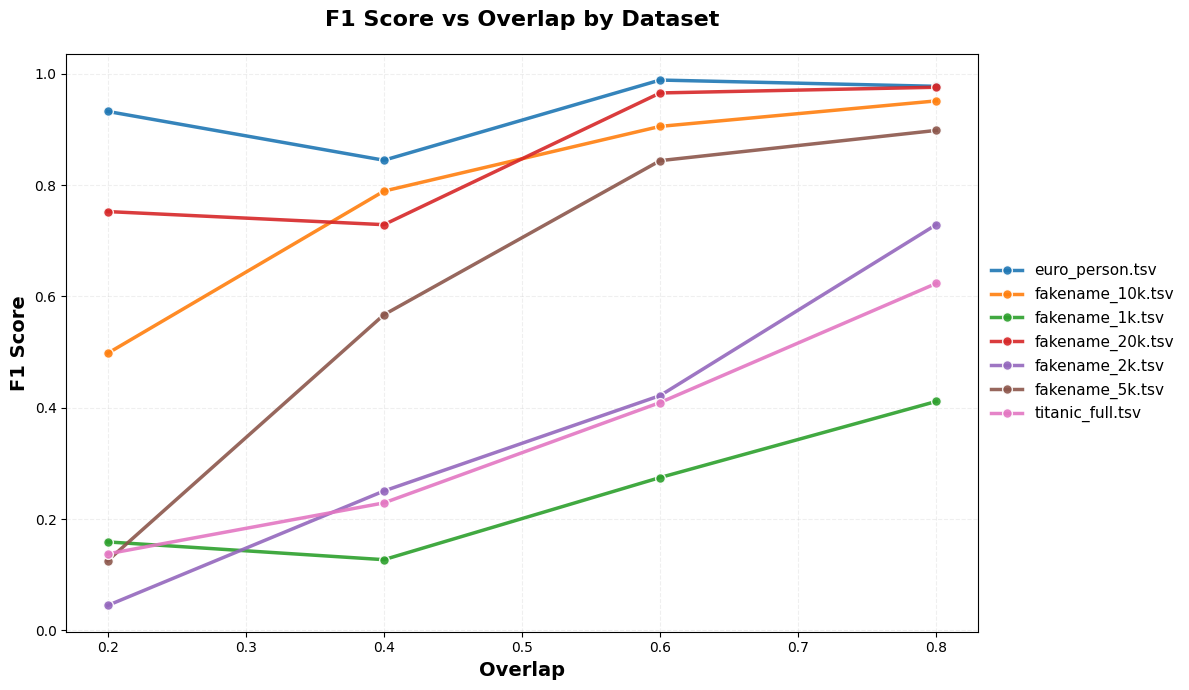

Encoding: TabMinHash


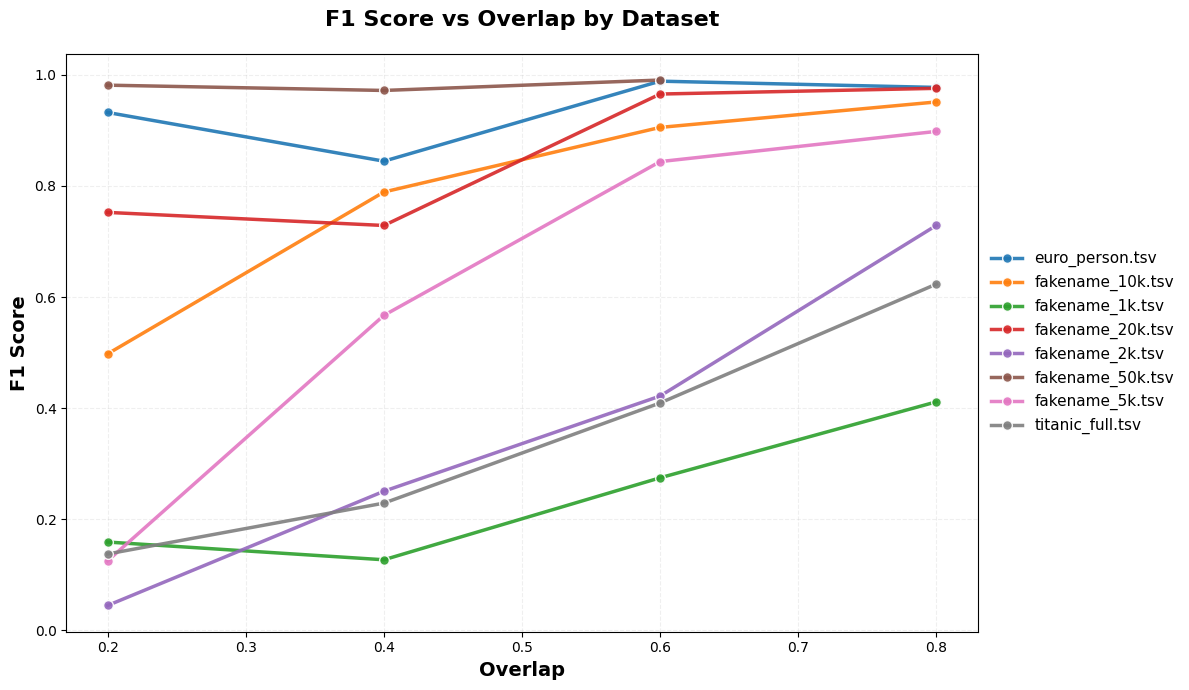

Encoding: TwoStepHash


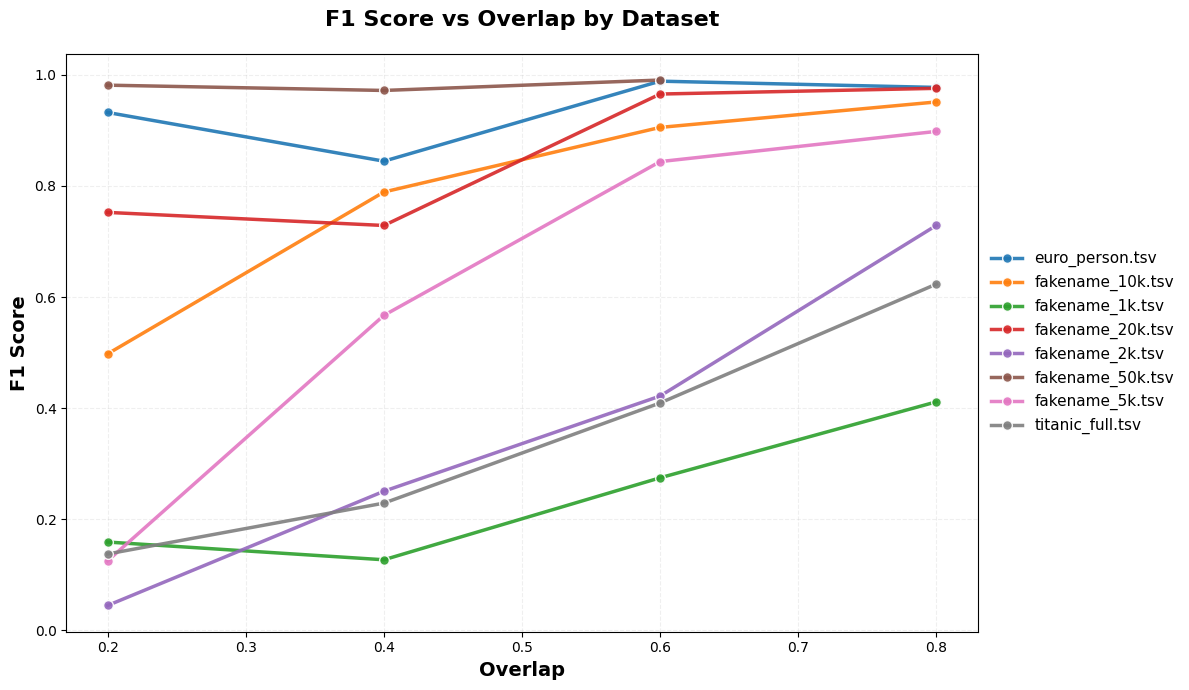

In [24]:
# Get unique encoding schemes
encodings = groupedByEncodingAndDataset['Encoding'].unique()

encodings.sort()

for i, encoding in enumerate(encodings):
    plt.figure(figsize=(12, 7))
    print("Encoding: " + encoding)
    encoding_data = groupedByEncodingAndDataset[groupedByEncodingAndDataset['Encoding'] == encoding]
    datasets = encoding_data['Dataset'].unique()
    
    datasets.sort()

    colors = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
    ]

    for i, dataset in enumerate(datasets):
        dataset_data = groupedByDataset[groupedByDataset['Dataset'] == dataset]
        
        plt.plot(dataset_data['Overlap'], dataset_data['TrainedF1'], 
                marker='o', 
                markersize=7,
                markeredgecolor="white",   # makes markers clearer
                linewidth=2.5, 
                color=colors[i % len(colors)],
                label=dataset,
                alpha=0.9)

    # Labels & title
    plt.xlabel('Overlap', fontsize=14, fontweight='bold')
    plt.ylabel('F1 Score', fontsize=14, fontweight='bold')
    plt.title('F1 Score vs Overlap by Dataset', fontsize=16, fontweight='bold', pad=20)

    # Legend outside the plot
    plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    # Grid improvements
    plt.grid(True, alpha=0.2, linestyle="--")

    plt.tight_layout()
    plt.show()

Encoding: BloomFilter


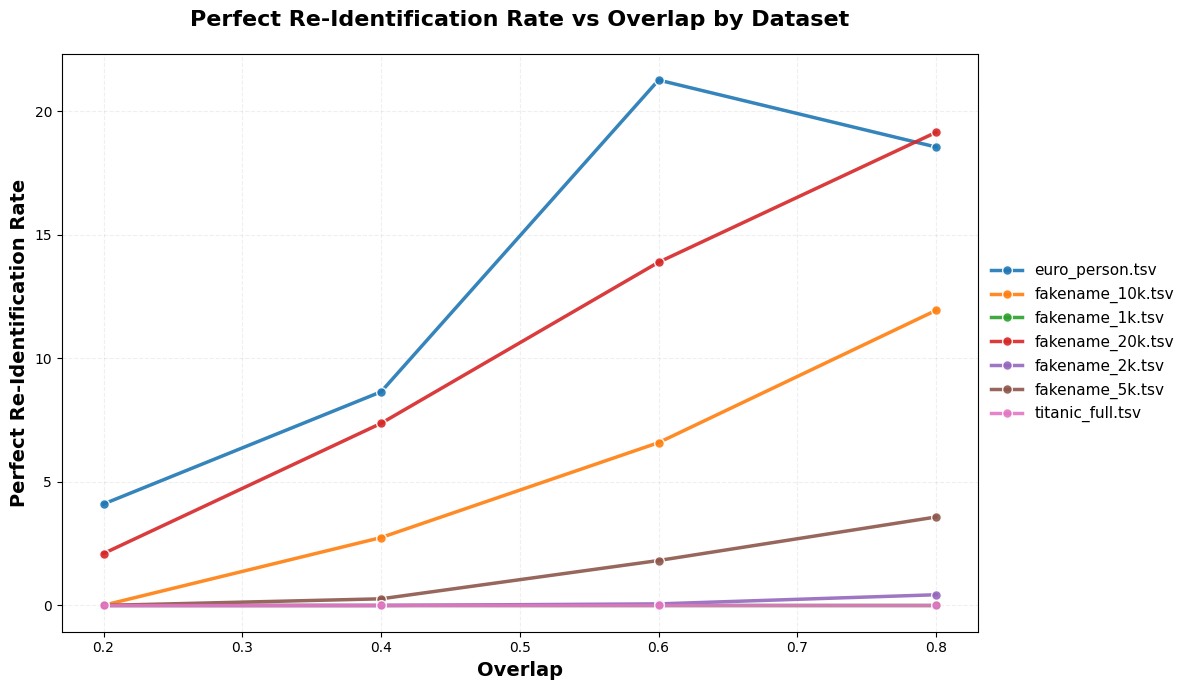

Encoding: TabMinHash


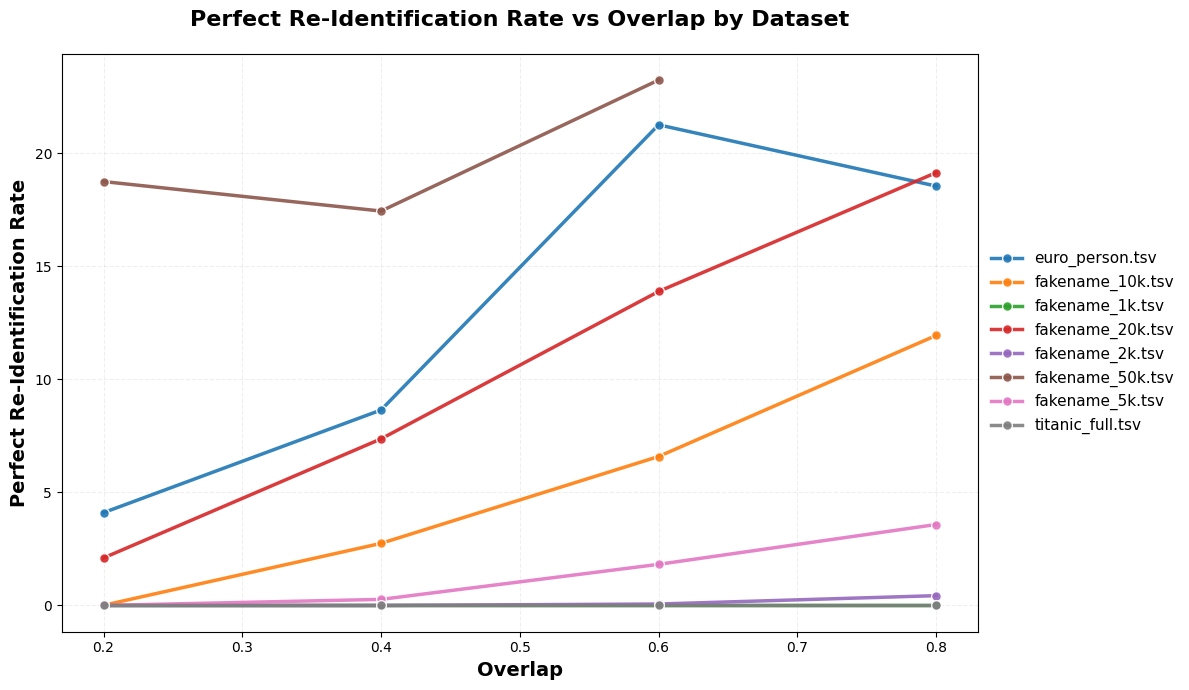

Encoding: TwoStepHash


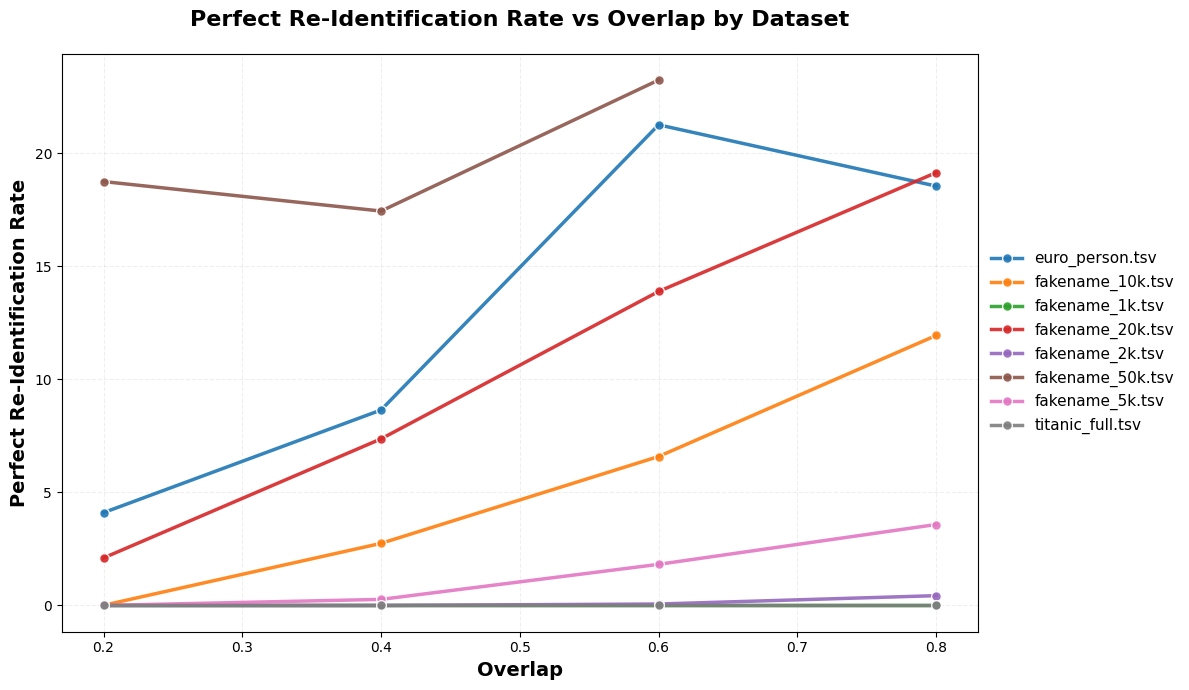

In [25]:
# Get unique encoding schemes
encodings = groupedByEncodingAndDataset['Encoding'].unique()

encodings.sort()

for i, encoding in enumerate(encodings):
    plt.figure(figsize=(12, 7))
    print("Encoding: " + encoding)
    encoding_data = groupedByEncodingAndDataset[groupedByEncodingAndDataset['Encoding'] == encoding]
    datasets = encoding_data['Dataset'].unique()
    
    datasets.sort()

    colors = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
    ]

    for i, dataset in enumerate(datasets):
        dataset_data = groupedByDataset[groupedByDataset['Dataset'] == dataset]
        
        plt.plot(dataset_data['Overlap'], dataset_data['ReidentificationRate'] * 100, 
                marker='o', 
                markersize=7,
                markeredgecolor="white",   # makes markers clearer
                linewidth=2.5, 
                color=colors[i % len(colors)],
                label=dataset,
                alpha=0.9)

    # Labels & title
    plt.xlabel('Overlap', fontsize=14, fontweight='bold')
    plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')
    plt.title('Perfect Re-Identification Rate vs Overlap by Dataset', fontsize=16, fontweight='bold', pad=20)

    # Legend outside the plot
    plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    # Grid improvements
    plt.grid(True, alpha=0.2, linestyle="--")

    plt.tight_layout()
    plt.show()